# NetworkX exercise 

In [1]:
%matplotlib inline
import networkx as nx
import vis_bel
import os
import pickle
import imp
import numpy as np
import itertools as itt

In [2]:
base = os.environ['BUG_FREE_EUREKA_BASE']
path_networkx_AD_pickled =os.path.join(base,'data','exercise05','networkx.graph.AD.pickled')

## Loading Alzheimer's disease network into networkX graph with pickle

In [3]:
graph_AD = pickle.load(open(path_networkx_AD_pickled,'rb'))

Here some words about [pickle](https://docs.python.org/3/library/pickle.html)

### Explore

In [4]:
len(graph_AD),len(graph_AD.nodes()), graph_AD.number_of_nodes()  # number of nodes

(11927, 11927, 11927)

In [5]:
graph_AD.number_of_edges() # number of nodes

59408

In [6]:
graph_AD[1] # node 1 connections with edge information

{2: {0: {'Subgraph': ('Non-amyloidogenic pathway', 'Gamma secretase pathway'),
   'citation': ('Other', 'Connectors', '123'),
   'evidence': 'The statements inside this citation is included to connect two entity types or triples, which will exist as islands/subnetworks in the big model.',
   'object_activity': 'act',
   'rel': 'decreases'},
  1: {'DiseaseState': ('Mild AD',),
   'FDASTATUS': ('Phase 3',),
   'Subgraph': ('Notch pathway', 'Gamma secretase pathway'),
   'citation': ('PubMed', 'Curr Med Chem. 2011;18(35):5430-47', '22087836'),
   'evidence': 'gamma-Secretase inhibitor believed to be associated with the inhibition of the cleavage of Notch, a transmembrane receptor involved in regulating cell-fate decisions.',
   'object_activity': 'pep',
   'rel': 'decreases'}},
 1828: {0: {'DiseaseState': ('Mild AD',),
   'FDASTATUS': ('Phase 3',),
   'Subgraph': ('Notch pathway', 'Gamma secretase pathway'),
   'citation': ('PubMed', 'Curr Med Chem. 2011;18(35):5430-47', '22087836'),
   '

In [7]:
graph_AD[1].keys() # nodes ids connected to node 1 

dict_keys([2, 1828])

In [8]:
graph_AD[1][2].keys()

dict_keys([0, 1])

In [9]:
graph_AD[1][2][0].get('rel')

'decreases'

In [10]:
graph_AD.nodes()[:2] # all nodes

[1, 2]

In [11]:
graph_AD.nodes(data=True)[:2]

[(1,
  {'BEL': 'a(CHEBI:"gamma-secretase inhibitor")',
   'function': 'a',
   'namespace': 'CHEBI',
   'value': 'gamma-secretase inhibitor'}),
 (2,
  {'BEL': 'complex(SCOMP:"gamma Secretase Complex")',
   'function': 'complex',
   'namespace': 'SCOMP',
   'value': '"gamma Secretase Complex"'})]

In [12]:
graph_AD.edges()[:2]

[(1, 2), (1, 2)]

In [13]:
graph_AD.edges(data=True,keys=True)[:2]

[(1,
  2,
  0,
  {'Subgraph': ('Non-amyloidogenic pathway', 'Gamma secretase pathway'),
   'citation': ('Other', 'Connectors', '123'),
   'evidence': 'The statements inside this citation is included to connect two entity types or triples, which will exist as islands/subnetworks in the big model.',
   'object_activity': 'act',
   'rel': 'decreases'}),
 (1,
  2,
  1,
  {'DiseaseState': ('Mild AD',),
   'FDASTATUS': ('Phase 3',),
   'Subgraph': ('Notch pathway', 'Gamma secretase pathway'),
   'citation': ('PubMed', 'Curr Med Chem. 2011;18(35):5430-47', '22087836'),
   'evidence': 'gamma-Secretase inhibitor believed to be associated with the inhibition of the cleavage of Notch, a transmembrane receptor involved in regulating cell-fate decisions.',
   'object_activity': 'pep',
   'rel': 'decreases'})]

In [48]:
nodes = set(itt.chain.from_iterable((fromN,toN) for fromN,toN  in graph_AD.edges()[:100]))

In [49]:
graph_100 = graph_AD.subgraph(nodes)
len(graph_100)

30

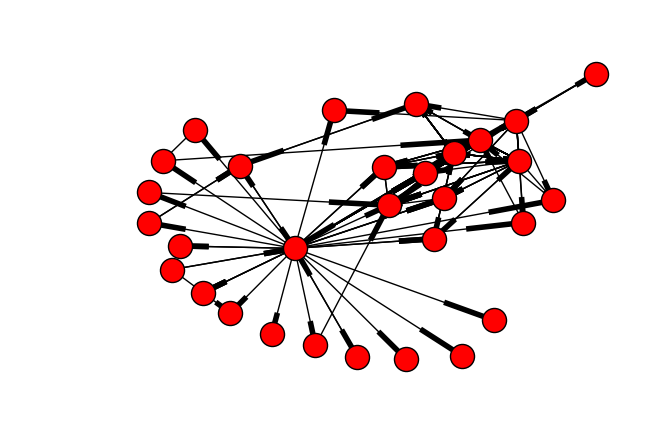

In [16]:
nx.draw(graph_100)

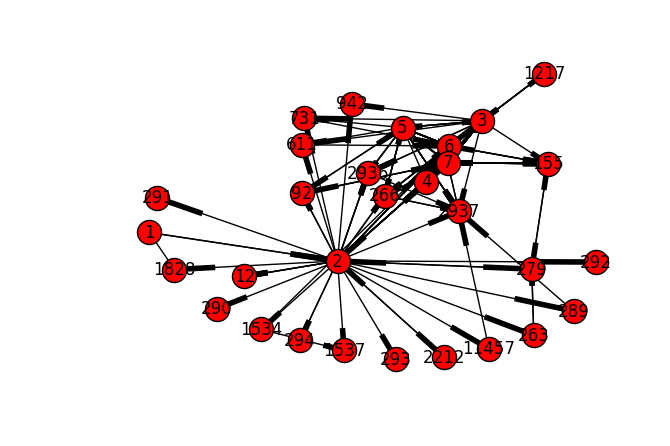

In [17]:
nx.draw_spring(graph_100, with_labels=True)
# delegates everything to the draw function

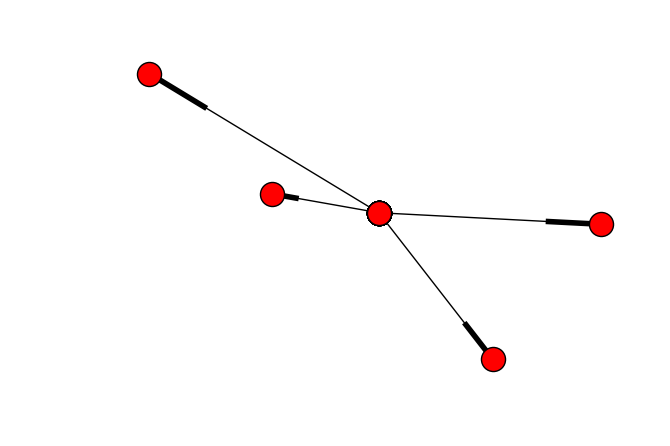

In [18]:
nx.draw_spectral(graph_100)
# eigenvalues

In [19]:
imp.reload(vis_bel)
vis_bel.draw(graph_100)

In [20]:
#for edge in graph_100.edges_iter(data=True,keys=True):
    #print(edge)
    #break
for u,v,k,a in graph_100.edges_iter(data=True,keys=True):
    print(u,v,k,a)
    break

1 2 0 {'evidence': 'The statements inside this citation is included to connect two entity types or triples, which will exist as islands/subnetworks in the big model.', 'citation': ('Other', 'Connectors', '123'), 'rel': 'decreases', 'Subgraph': ('Non-amyloidogenic pathway', 'Gamma secretase pathway'), 'object_activity': 'act'}


## Tasks

0. Find the node with the highest degree in graph_100
0. get all distinct attribute keys in nodes and edges for graph_100
0. Write a function which allows you to search all edges in the graph_100 with any key (or key/value). Allow value to be optional
0. Find shortest paths between all nodes link to the edges found in the previous task and create a new graph, display it 

**hint** : Write a function which allows you to search all edges in the graph_100 with any key (or key/value). Allow value to be optional

In [33]:
#task 1
print(graph_100.degree().items())
#print(graph_100.degree().keys())
#print(graph_100.degree().values())

dict_items([(1, 3), (2, 46), (3, 208), (4, 20), (5, 46), (6, 252), (263, 3), (266, 15), (12, 3), (291, 1), (1537, 2), (279, 6), (292, 1), (155, 15), (92, 7), (731, 4), (289, 2), (290, 1), (611, 4), (2212, 2), (293, 1), (294, 2), (7, 105), (942, 2), (1217, 4), (1534, 3), (1828, 2), (2936, 9), (2937, 17), (11457, 2)])


In [34]:
import operator
max(graph_100.degree().items(), key=operator.itemgetter(1))

(6, 252)

In [26]:
import operator
Node = max(graph_100.degree().items(), key=operator.itemgetter(1))[0]
print (Node)

6


In [53]:
#task 2
distinct_nodes_attribute = []
for item in graph_100.nodes(data = True):
    #print (graph_100.nodes(data = True))
    for attr in item[1].keys():
        if attr not in distinct_nodes_attribute:
            distinct_nodes_attribute.append(attr)
distinct_nodes_attribute

[(1, {'value': 'gamma-secretase inhibitor', 'BEL': 'a(CHEBI:"gamma-secretase inhibitor")', 'function': 'a', 'namespace': 'CHEBI'}), (2, {'value': '"gamma Secretase Complex"', 'BEL': 'complex(SCOMP:"gamma Secretase Complex")', 'function': 'complex', 'namespace': 'SCOMP'}), (3, {'value': 'BACE1', 'BEL': 'p(HGNC:"BACE1")', 'function': 'p', 'namespace': 'HGNC', 'valid_NSV': True}), (4, {'BEL': 'reaction(reactants(p(HGNC:APP)),products(a(ADO:"Abeta_42")))', 'function': 'reaction'}), (5, {'value': 'APP', 'BEL': 'p(HGNC:"APP")', 'function': 'p', 'namespace': 'HGNC', 'valid_NSV': True}), (6, {'value': 'Abeta_42', 'BEL': 'a(ADO:"Abeta_42")', 'function': 'a', 'namespace': 'ADO', 'valid_NSV': True}), (263, {'value': 'NOTCH Family', 'BEL': 'p(SFAM:"NOTCH Family")', 'function': 'p', 'namespace': 'SFAM', 'valid_NSV': True}), (266, {'value': 'LRP1', 'BEL': 'p(HGNC:"LRP1")', 'function': 'p', 'namespace': 'HGNC', 'valid_NSV': True}), (12, {'BEL': 'list(p(HGNC:PSEN1),p(HGNC:NCSTN),p(HGNC:APH1A),p(HGNC:P

['value', 'BEL', 'function', 'namespace', 'valid_NSV', 'list']

In [37]:
distinct_edges_attribute = []
for item in graph_100.edges(data=True):
    #print (graph_100.edges(data = True))
    for attr in item[2].keys():
        if attr not in distinct_edges_attribute:
            distinct_edges_attribute.append(attr)
distinct_edges_attribute

['evidence',
 'citation',
 'rel',
 'Subgraph',
 'object_activity',
 'FDASTATUS',
 'DiseaseState',
 'subject_activity',
 'FluidAndSecretion',
 'CellStructure',
 'NervousSystem',
 'MeSHDisease',
 'UserdefinedCellLine',
 'DigestiveSystem',
 'Species',
 'Cell',
 'subject_translocation',
 'subject_translocation_from_namespace',
 'subject_translocation_to_value',
 'subject_translocation_to_namespace',
 'subject_translocation_from_value',
 'UserdefinedSpecies',
 'CellLine',
 'UserdefinedGender',
 'Duration_of_Chemical_Exposure',
 'Encode_Feature_Types',
 'Developmental_Phase__of_patient',
 'object_translocation_from_value',
 'object_translocation',
 'object_translocation_from_namespace',
 'object_translocation_to_namespace',
 'object_translocation_to_value',
 'CardiovascularSystem',
 'Tissue']

In [60]:
#task 2 (other option)

def get_dist_node(graph):
    node_keys = set()
    for node_index,value in graph_100.nodes_iter(data=True):
        node_keys.update(value.keys())
    return node_keys

get_dist_node(graph_100)

#%timeit get_dist_node(graph_100)

{'BEL', 'function', 'list', 'namespace', 'valid_NSV', 'value'}

In [ ]:
#task 3
def find_edges_by_attrib_key_value(graph, attribKey, attribValue=None):
    edge_list = []
    if attribValue is None:
        for item in graph_100.edges(data=True):
                if attribKey in item[2]:
                    edge_list.append(item)
    else:            
        for item in graph_100.edges(data=True):
            if attribKey in item[2]:
                if attribValue in item[2][attribKey]:
                    edge_list.append(item)                    
    return edge_list

In [ ]:
#task 3 (other option)
def get_edges(graph,key,value=None):
    for edge in graph.edges(data=True,Keys=True):
        attribs = edge[3]
        if key in attribs:
            if value is not None:
                if isinstance(value,tuple) and value in attribs[key]:
                    edges_list.append(edge)
                    

In [56]:
find_edges_by_attrib_key_value(graph_100, 'MeSHDisease')[:2]

[(2,
  2212,
  {'MeSHDisease': ('Alzheimer Disease',),
   'Subgraph': ('Phosphatidylinositol 3 pathway',),
   'citation': ('PubMed',
    'J Neurochem. 2007 Aug;102(3):848-57. Epub 2007 Apr 16',
    '17437536'),
   'evidence': "We previously showed that some familial Alzheimer's disease PS mutations cause increased basal and acetylcholine muscarinic receptor-stimulated phospholipase C (PLC) activity which was gamma-secretase dependent.",
   'rel': 'association'}),
 (2,
  7,
  {'MeSHDisease': ('Alzheimer Disease',),
   'Subgraph': ('Phosphatidylinositol 3 pathway',),
   'citation': ('PubMed',
    'J Neurochem. 2007 Aug;102(3):848-57. Epub 2007 Apr 16',
    '17437536'),
   'evidence': "We previously showed that some familial Alzheimer's disease PS mutations cause increased basal and acetylcholine muscarinic receptor-stimulated phospholipase C (PLC) activity which was gamma-secretase dependent.",
   'rel': 'association'})]

In [40]:
find_edges_by_attrib_key_value(graph_100, 'MeSHDisease', 'Alzheimer Disease')[:3]

[(2,
  2212,
  {'MeSHDisease': ('Alzheimer Disease',),
   'Subgraph': ('Phosphatidylinositol 3 pathway',),
   'citation': ('PubMed',
    'J Neurochem. 2007 Aug;102(3):848-57. Epub 2007 Apr 16',
    '17437536'),
   'evidence': "We previously showed that some familial Alzheimer's disease PS mutations cause increased basal and acetylcholine muscarinic receptor-stimulated phospholipase C (PLC) activity which was gamma-secretase dependent.",
   'rel': 'association'}),
 (2,
  7,
  {'MeSHDisease': ('Alzheimer Disease',),
   'Subgraph': ('Phosphatidylinositol 3 pathway',),
   'citation': ('PubMed',
    'J Neurochem. 2007 Aug;102(3):848-57. Epub 2007 Apr 16',
    '17437536'),
   'evidence': "We previously showed that some familial Alzheimer's disease PS mutations cause increased basal and acetylcholine muscarinic receptor-stimulated phospholipase C (PLC) activity which was gamma-secretase dependent.",
   'rel': 'association'}),
 (3,
  4,
  {'MeSHDisease': ('Alzheimer Disease',),
   'NervousSyst

In [42]:
#task 4

list_edges_AD = find_edges_by_attrib_key_value(graph_100, 'MeSHDisease', 'Alzheimer Disease')
AD_subgraph = nx.MultiDiGraph()
AD_subgraph.add_edges_from(list_edges_AD)
# # nx.shortest_path(graph_100, )
nx.shortest_path(AD_subgraph)

{2: {2: [2],
  3: [2, 7, 3],
  4: [2, 7, 3, 4],
  5: [2, 7, 3, 5],
  6: [2, 7, 3, 6],
  7: [2, 7],
  2212: [2, 2212]},
 3: {2: [3, 7, 2],
  3: [3],
  4: [3, 4],
  5: [3, 5],
  6: [3, 6],
  7: [3, 7],
  2212: [3, 7, 2, 2212]},
 4: {4: [4]},
 5: {2: [5, 3, 7, 2],
  3: [5, 3],
  4: [5, 3, 4],
  5: [5],
  6: [5, 3, 6],
  7: [5, 3, 7],
  2212: [5, 3, 7, 2, 2212]},
 6: {2: [6, 7, 2],
  3: [6, 3],
  4: [6, 3, 4],
  5: [6, 3, 5],
  6: [6],
  7: [6, 7],
  2212: [6, 7, 2, 2212]},
 7: {2: [7, 2],
  3: [7, 3],
  4: [7, 3, 4],
  5: [7, 3, 5],
  6: [7, 3, 6],
  7: [7],
  2212: [7, 2, 2212]},
 2212: {2: [2212, 2],
  3: [2212, 2, 7, 3],
  4: [2212, 2, 7, 3, 4],
  5: [2212, 2, 7, 3, 5],
  6: [2212, 2, 7, 3, 6],
  7: [2212, 2, 7],
  2212: [2212]}}

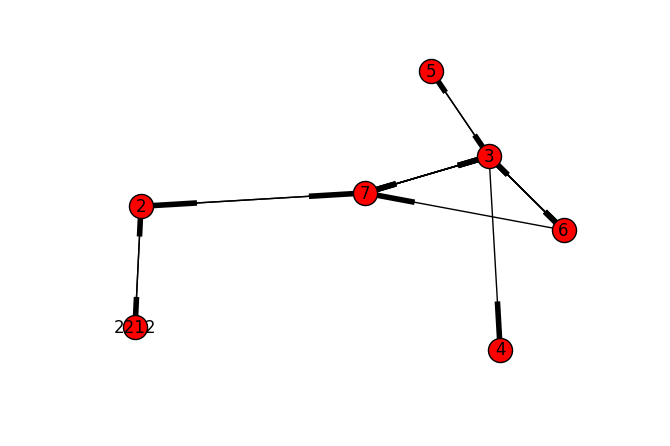

In [61]:
nx.draw(AD_subgraph, with_labels=True)